In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from fuzzywuzzy import fuzz 

sns.set_palette("husl")

%matplotlib inline

In [116]:
tweets = pd.read_csv('./data/train.csv', encoding='utf-8')
tweets.loc[:,'keyword'] = tweets.loc[:,'keyword'].str.replace("%20", " ")
tweets.sample(10)

,id,keyword,location,text,target
3169,4548,emergency plan,"Antioch, CA",4 Printable Emergency Plan Templates\nhttp://t...,0
22,33,NaN,NaN,Love skiing,0
4356,6188,hijacker,San Francisco Bay Area,Gov. Brown allows parole for 1976 Chowchilla s...,0
1172,1689,bridge collapse,"Mumbai , India",Warne shocked over Australia's epic collapse a...,1
2685,3851,detonation,NaN,Ignition Knock (Detonation) Sensor-Senso Stand...,0
6742,9660,tornado,cognitive dissonance town,@soonergrunt better than tornado!,0
5595,7983,razed,NaN,The Latest: More Homes Razed by Northern Calif...,1
3244,4661,engulfed,NaN,Tube strike live: Latest travel updates as Lon...,1
1261,1817,buildings on fire,New Hampshire,17 people displaced after 3-alarm fire tore th...,1
2874,4131,drought,NaN,@KarinaGarciaxo_ me &amp; you both &amp; I'll ...,0


In [117]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Análisis de Keyword vs Target

## ¿Cuántas keywords únicas?

In [118]:
len(tweets.keyword.unique())

222




## Categorizar "keyword"

In [119]:
#Recibe una lista de keywords y regresa un diccionario cuyas claves son los elementos de la lista pasada y los valores
#son las keywords agrupadas que las representa
def get_keyword_dic(key_list):
    key_dic = {}
    unique_list = []
    for x in key_list:
        similarity = 0
        value = ""
        for y in unique_list:
            ratio = fuzz.ratio(x,y)
            if ratio > similarity:
                similarity = ratio
                value = y
        if similarity > 75:
            key_dic[x] = value
        else:
            key_dic[x] = x
            unique_list.append(x)
    return key_dic
categorical_keyword = get_keyword_dic(tweets.loc[:,'keyword'].dropna().tolist())

In [120]:
categorical_keyword

{'ablaze': 'ablaze',
 'accident': 'accident',
 'aftershock': 'aftershock',
 'airplane accident': 'airplane accident',
 'ambulance': 'ambulance',
 'annihilated': 'annihilated',
 'annihilation': 'annihilated',
 'apocalypse': 'apocalypse',
 'armageddon': 'armageddon',
 'army': 'army',
 'arson': 'arson',
 'arsonist': 'arson',
 'attack': 'attack',
 'attacked': 'attack',
 'avalanche': 'avalanche',
 'battle': 'battle',
 'bioterror': 'bioterror',
 'bioterrorism': 'bioterror',
 'blaze': 'ablaze',
 'blazing': 'blazing',
 'bleeding': 'bleeding',
 'blew up': 'blew up',
 'blight': 'blight',
 'blizzard': 'blizzard',
 'blood': 'blood',
 'bloody': 'blood',
 'blown up': 'blew up',
 'body bag': 'body bag',
 'body bagging': 'body bag',
 'body bags': 'body bag',
 'bomb': 'bomb',
 'bombed': 'bomb',
 'bombing': 'bombing',
 'bridge collapse': 'bridge collapse',
 'buildings burning': 'buildings burning',
 'buildings on fire': 'buildings on fire',
 'burned': 'burned',
 'burning': 'burning',
 'burning buildings

In [121]:
categorical_keyword['blazing'] = 'ablaze'
categorical_keyword['bleeding'] = 'blood'
categorical_keyword['buildings%20on%20fire'] = 'buildings burning'
categorical_keyword['burning%20buildings'] = 'buildings burning'
categorical_keyword['burning'] = 'burned'
categorical_keyword['dead'] = 'death'
categorical_keyword['demolition'] = 'demolish'
categorical_keyword['destruction'] = 'destroy'
categorical_keyword['explosion'] = 'explode'
categorical_keyword['flood'] = 'flooding'
categorical_keyword['floods'] = 'flooding'
categorical_keyword['inundated'] = 'inundation'
categorical_keyword['panic'] = 'panicking'
categorical_keyword['rainstorm'] = 'rainstorm'
categorical_keyword['riot'] = 'rioting'
categorical_keyword['screaming'] = 'screamed'
categorical_keyword['snowstorm'] = 'snowstorm'
categorical_keyword['survivors'] = 'survive'
categorical_keyword['traumatised'] = 'trauma'
categorical_keyword['violent%20storm'] = 'storm'
categorical_keyword['windstorm'] = 'storm'
categorical_keyword['traumatised'] = 'trauma'

In [122]:
tweets.loc[:,'categorical_keyword'] = tweets.keyword.dropna().transform(lambda x: categorical_keyword[x])
tweets.sample(10)

,id,keyword,location,text,target,categorical_keyword
3995,5674,floods,NaN,Have you ever remembered an old song something...,0,flooding
2481,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...,1,desolate
4378,6219,hijacker,California,Governor weighs parole for California school b...,1,hijack
2673,3835,detonate,"Sharkatraz/Bindle's Cleft, PA",@AutoAmes everyone hoped we would join ISIS an...,0,detonate
6481,9268,sunk,NAIROBI KENYA,#ArrestpastorNganga it so worrying 2 see how s...,0,sunk
4984,7111,military,NaN,@kiranahmedd US military and Nato are fighting...,1,military
2566,3681,destroy,NaN,Let's destroy Twitter with @fouseyTUBE @zaynma...,0,destroy
3135,4504,emergency,"New Orleans, LA",Emergency Dispatchers in Boone County in the h...,0,emergency
4427,6300,hostage,Glenview to Knoxville,I'm hungry as a hostage,0,hostage
5012,7148,mudslide,Malibu/SantaFe/Winning!,STERLING-SCOTT on the Red Carpet at a fundrais...,1,mudslide


### ¿Cuántas categorías de keyword quedan?

In [123]:
len(tweets.categorical_keyword.unique())

150

## Visualización wordcloud de las keywords categóricas

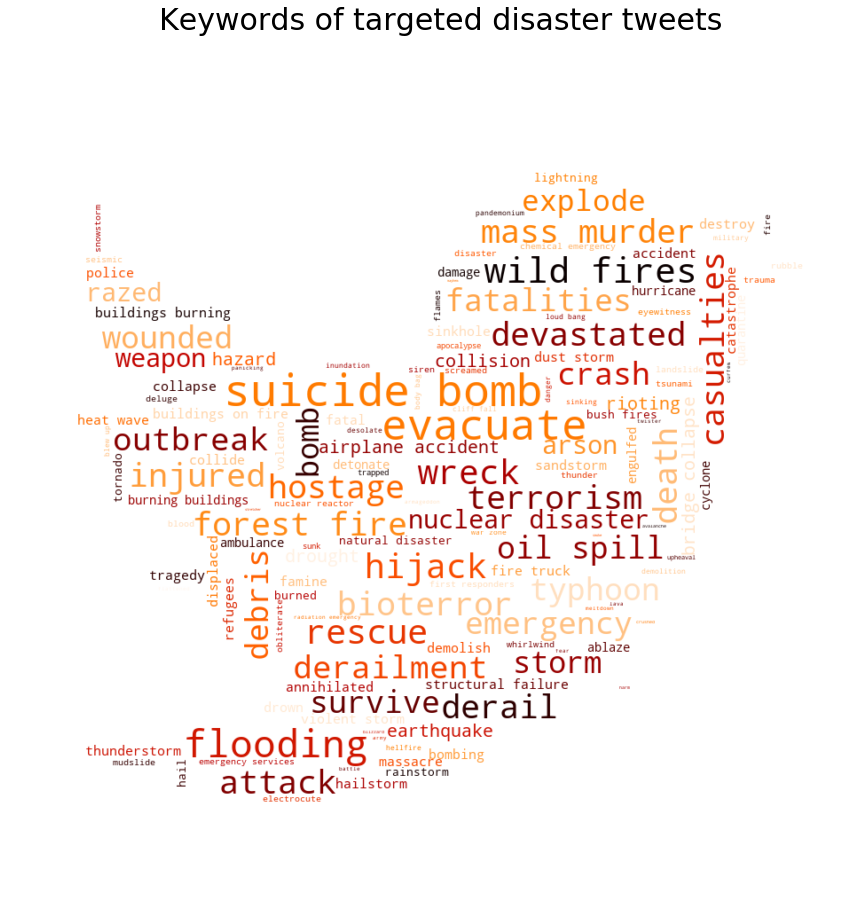

In [124]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

keywords_count = tweets.loc[tweets['target'] == 1].categorical_keyword.value_counts()
keywords_count.index = keywords_count.index.map(str)

mask = np.array(Image.open("./img/twitter_black.png"))
mask_transformed = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    mask_transformed[i] = list(map(transform_format, mask[i]))

wordcloud = WordCloud(max_font_size=50, max_words=200, random_state=42, 
                      background_color='white', colormap='gist_heat',
                      mask=mask_transformed)
wordcloud.generate_from_frequencies(keywords_count)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Keywords of targeted disaster tweets", fontsize=30, pad=40)
plt.axis("off")
plt.show()

## Porcentaje de verdaderos y falsos por cada keyword

In [125]:
keywords_grouped = tweets.groupby(['categorical_keyword', 'target']).agg({'categorical_keyword':['count']})
keywords_level1 = keywords_grouped.columns.get_level_values(1)

print(keywords_level1)

keywords_grouped.columns = keywords_level1
keywords_grouped.reset_index(inplace=True)
keywords_grouped.head(10)

Index(['count'], dtype='object')


,categorical_keyword,target,count
0,ablaze,0,89
1,ablaze,1,19
2,accident,0,11
3,accident,1,24
4,aftershock,0,34
5,airplane accident,0,5
6,airplane accident,1,30
7,ambulance,0,18
8,ambulance,1,20
9,annihilated,0,42


In [126]:
keywords_total_count = tweets.groupby(['categorical_keyword']).agg({'categorical_keyword': ['count']})
keywords_total_count.columns = 'total_' + keywords_total_count.columns.get_level_values(1)
keywords_total_count.reset_index(inplace=True)
keywords_total_count.head(10)

,categorical_keyword,total_count
0,ablaze,108
1,accident,35
2,aftershock,34
3,airplane accident,35
4,ambulance,38
5,annihilated,63
6,apocalypse,32
7,armageddon,42
8,army,34
9,arson,66


In [127]:
keywords = keywords_grouped.merge(keywords_total_count, left_on='categorical_keyword', right_on='categorical_keyword', how='left')
keywords.loc[:,'percentage_count'] = (keywords.loc[:, 'count'] / keywords.loc[:, 'total_count']) * 100
keywords.head(10)

,categorical_keyword,target,count,total_count,percentage_count
0,ablaze,0,89,108,82.407407
1,ablaze,1,19,108,17.592593
2,accident,0,11,35,31.428571
3,accident,1,24,35,68.571429
4,aftershock,0,34,34,100.000000
5,airplane accident,0,5,35,14.285714
6,airplane accident,1,30,35,85.714286
7,ambulance,0,18,38,47.368421
8,ambulance,1,20,38,52.631579
9,annihilated,0,42,63,66.666667


## Keywords tweets más acertados, tomando como >= 90% targeted y frecuencia mayor a 10 (Verdadero)

In [144]:
targeted_keywords = keywords.loc[(keywords['percentage_count'] >= 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 1)]
targeted_keywords

,categorical_keyword,target,count,total_count,percentage_count
40,bombing,1,27,29,93.103448
81,debris,1,37,37,100.000000
90,derailment,1,39,39,100.000000
194,nuclear disaster,1,31,34,91.176471
200,oil spill,1,37,38,97.368421
202,outbreak,1,39,40,97.500000
250,suicide bomb,1,94,99,94.949495
276,typhoon,1,37,38,97.368421


Text(0,0.5,'Keyword')

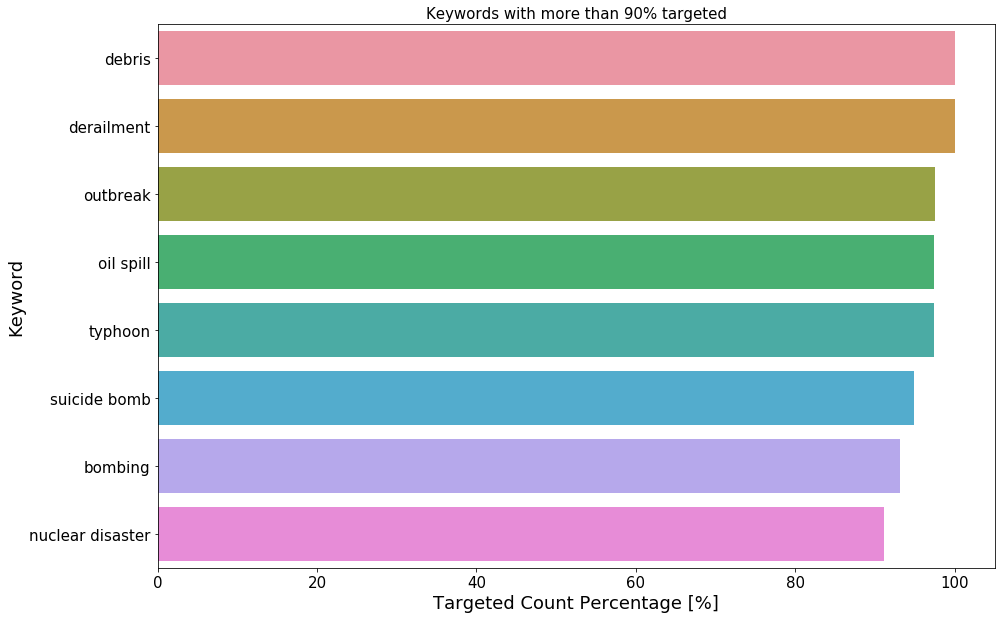

In [145]:
targeted_keywords = targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=targeted_keywords['percentage_count'], y=targeted_keywords['categorical_keyword'],
               orient='h')

g.set_title('Keywords with more than 90% targeted', fontsize=15)
g.set_xlabel('Targeted Count Percentage [%]', fontsize=18)
g.set_ylabel('Keyword', fontsize=18)

## Keywords de tweets menos acertados, tomando como >= 90% not targeted y frecuencia mayor a 10 (Falsos)

In [146]:
not_targeted_keywords = keywords.loc[(keywords['percentage_count'] >= 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 0)]
not_targeted_keywords

# frequency >= 10

,categorical_keyword,target,count,total_count,percentage_count
4,aftershock,0,34,34,100.000000
29,blight,0,30,32,93.750000
35,body bag,0,100,107,93.457944
119,epicentre,0,11,12,91.666667
153,harm,0,37,41,90.243902
183,mayhem,0,27,30,90.000000
205,panicking,0,65,70,92.857143
225,ruin,0,36,37,97.297297
239,smoke,0,31,34,91.176471
245,stretcher,0,30,33,90.909091


Text(0,0.5,'Keyword')

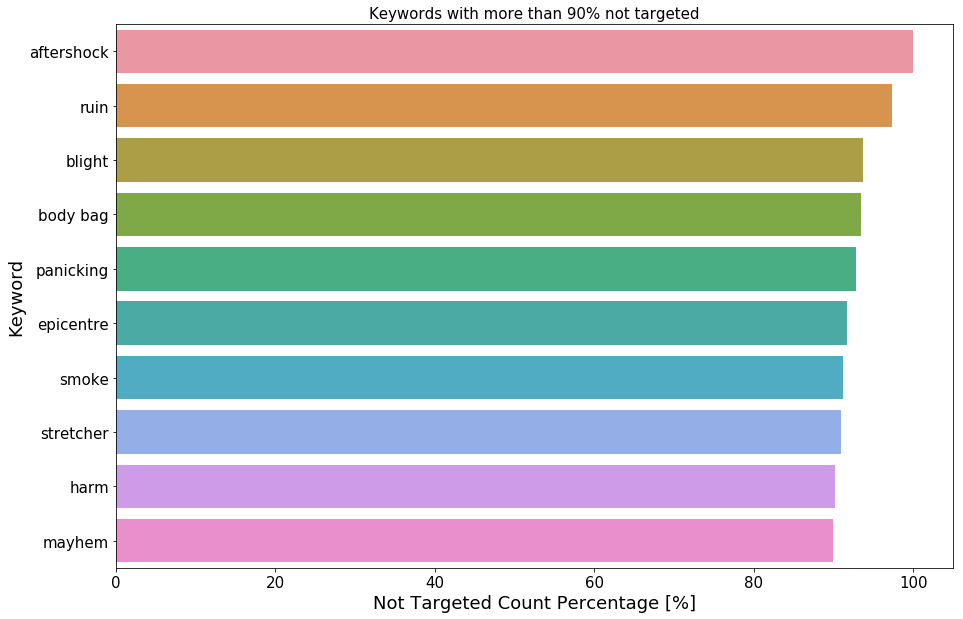

In [147]:
not_targeted_keywords = not_targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=not_targeted_keywords['percentage_count'], y=not_targeted_keywords['categorical_keyword'],
               orient='h')

g.set_title('Keywords with more than 90% not targeted', fontsize=15)
g.set_xlabel('Not Targeted Count Percentage [%]', fontsize=18)
g.set_ylabel('Keyword', fontsize=18)

## Distribución largo de la Keyword en función de si es verdadero o falso

In [ ]:
keyword_tweets = tweets.dropna(subset=['keyword']).copy()
keyword_tweets['keyword_length'] = keyword_tweets['keyword'].apply(len)
keyword_tweets

In [ ]:
keyword_length = keyword_tweets.groupby(['target'])\
                .agg({'keyword_length': ['count','mean','min','max']})
keyword_length.columns = keyword_length.columns.get_level_values(0) + \
                '_' + keyword_length.columns.get_level_values(1)
keyword_length.reset_index(inplace=True)
keyword_length

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.kdeplot(keyword_tweets.loc[(keyword_tweets['target'] == 1), :]['keyword_length'], 
                color='green',
                label='Targeted',
                shade=True,
               ax= ax)
g = sns.kdeplot(keyword_tweets.loc[(keyword_tweets['target'] == 0), :]['keyword_length'], 
                color='red',
                label='Not Targeted',
                shade=True,
               ax= ax)

g.set_title('Keyword Length Distribution per Target', fontsize=18)
g.set_xlabel('Keyword Length', fontsize=18)
g.set_ylabel('Density', fontsize=18)
g.legend(loc='upper left')

# Análisis de Location vs Target

In [131]:
tweets_location = pd.read_csv('./data/tweets_with_clean_location.csv', encoding='utf-8')
tweets_location.loc[:,'keyword'] = tweets_location.loc[:,'keyword'].str.replace("%20", " ")
tweets_location.sample(10)

,Unnamed: 0,id,keyword,location,text,target,address_latitude_longitude,city,country,latitude,longitude
1717,1717,2478,collided,NaN,The 2 cars right in front of me collided and I...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
579,579,837,bioterror,"Silver Spring, MD",.@APHL responds: FedEx no longer to transport ...,1,"('Silver Spring, Montgomery County, Maryland, ...",Silver Spring,United States of America,38.995946,-77.027623
985,985,1429,body bagging,have car; will travel,@matt_bez oh I'm not bagging her at all! Her b...,0,"(None, None, None)",NaN,NaN,NaN,NaN
7476,7476,10693,wreck,Pratt-on-Wye,How many cars do those cyclists wreck going pa...,0,"(None, None, None)",NaN,NaN,NaN,NaN
4357,4357,6191,hijacker,"Louisville, KY",Remove the http://t.co/VbqmZ5aPwj and Linkury ...,1,"('Louisville, Jefferson County, Kentucky, Unit...",Louisville,United States of America,38.254238,-85.759407
7006,7006,10044,twister,NaN,White Twister Black shift knob M6x1.00 Thread ...,0,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
4579,4579,6512,injuries,"Alameda and Pleasanton, CA",A new type of ADHD? Head injuries in children ...,0,"('Pleasanton, Alameda County, California, Unit...",Pleasanton,United States of America,37.662431,-121.874679
3542,3542,5064,famine,"Kyiv, Ukraine",#Russia 'food crematoria' provoke outrage in c...,1,"('Київ, Україна', 50.4500336, 30.5241361)",Київ,Україна,50.450034,30.524136
7262,7262,10396,whirlwind,NaN,life can wild when... \nyou're caught in a whi...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
7419,7419,10612,wounded,NaN,Police Officer Wounded Suspect Dead After Exch...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029


## Top 5 países con más de 20 tweets y la cantidad de tweets reales relativo de desastre

In [132]:
count_by_country = tweets_location.groupby(['country']).size().to_frame()
count_by_country.reset_index(inplace=True)
count_by_country.columns = ['country', 'ctry_count']
count_by_country.head(3)

,country,ctry_count
0,Argentina,15
1,Armenia,1
2,Australia,102


In [133]:
targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 1].groupby(['country']).size().to_frame()
targeted_tweets_location.reset_index(inplace=True)
targeted_tweets_location.columns = ['country', 'targeted_ctry_count']
targeted_tweets_location.head(3)

,country,targeted_ctry_count
0,Argentina,6
1,Australia,57
2,Bangladesh,2


In [134]:
count_by_country = count_by_country.merge(targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_targeted_ctry_count'] = count_by_country.loc[:,'targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count']
count_by_country.sample(5)

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count
34,New Zealand,25,10,0.400000
54,Sénégal,1,1,1.000000
40,Polska,10,5,0.500000
22,Indonesia,19,9,0.473684
65,Việt Nam,2,1,0.500000


In [135]:
top_5_ctry_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_targeted_ctry_count'])
top_5_ctry_targeted

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count
35,Nigeria,37,24,0.648649
13,Deutschland,25,16,0.640000
29,Kenya,22,14,0.636364
21,India,112,71,0.633929
1,Australia,102,57,0.558824


Text(0,0.5,'Country')

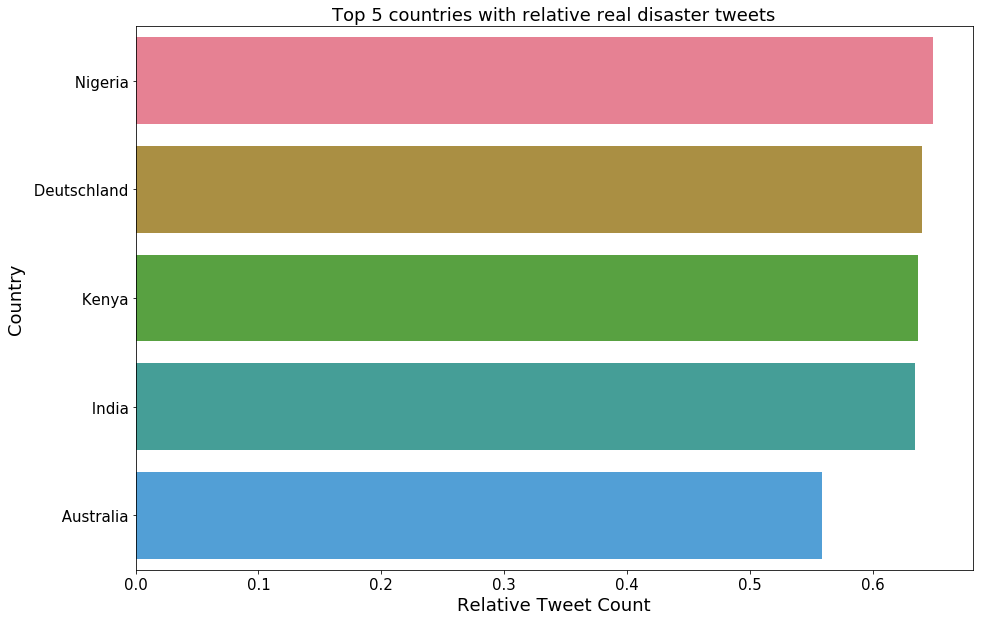

In [136]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_5_ctry_targeted['relative_targeted_ctry_count'], y=top_5_ctry_targeted['country'],
               orient='h')

g.set_title('Top 5 countries with relative real disaster tweets', fontsize=18)
g.set_xlabel('Relative Tweet Count', fontsize=18)
g.set_ylabel('Country', fontsize=18)

## Top 5 países con más de 20 tweets y la cantidad de tweets falsos relativo de desastre

In [137]:
not_targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 0].groupby(['country']).size().to_frame()
not_targeted_tweets_location.reset_index(inplace=True)
not_targeted_tweets_location.columns = ['country','not_targeted_ctry_count']
not_targeted_tweets_location.head(3)

,country,not_targeted_ctry_count
0,Argentina,9
1,Armenia,1
2,Australia,45


In [138]:
count_by_country = count_by_country.merge(not_targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_not_targeted_ctry_count'] = count_by_country.loc[:,'not_targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count']
count_by_country.head(5)

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count,not_targeted_ctry_count,relative_not_targeted_ctry_count
0,Argentina,15,6,0.400000,9,0.600000
1,Australia,102,57,0.558824,45,0.441176
2,Bangladesh,3,2,0.666667,1,0.333333
3,Barbados,2,1,0.500000,1,0.500000
4,België - Belgique - Belgien,4,2,0.500000,2,0.500000


In [139]:
top_5_ctry_not_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_not_targeted_ctry_count'])
top_5_ctry_not_targeted

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count,not_targeted_ctry_count,relative_not_targeted_ctry_count
34,Philippines,35,10,0.285714,25,0.714286
38,România,22,7,0.318182,15,0.681818
44,South Africa,25,9,0.360000,16,0.640000
50,United Kingdom,419,154,0.367542,265,0.632458
30,New Zealand,25,10,0.400000,15,0.600000


Text(0,0.5,'Country')

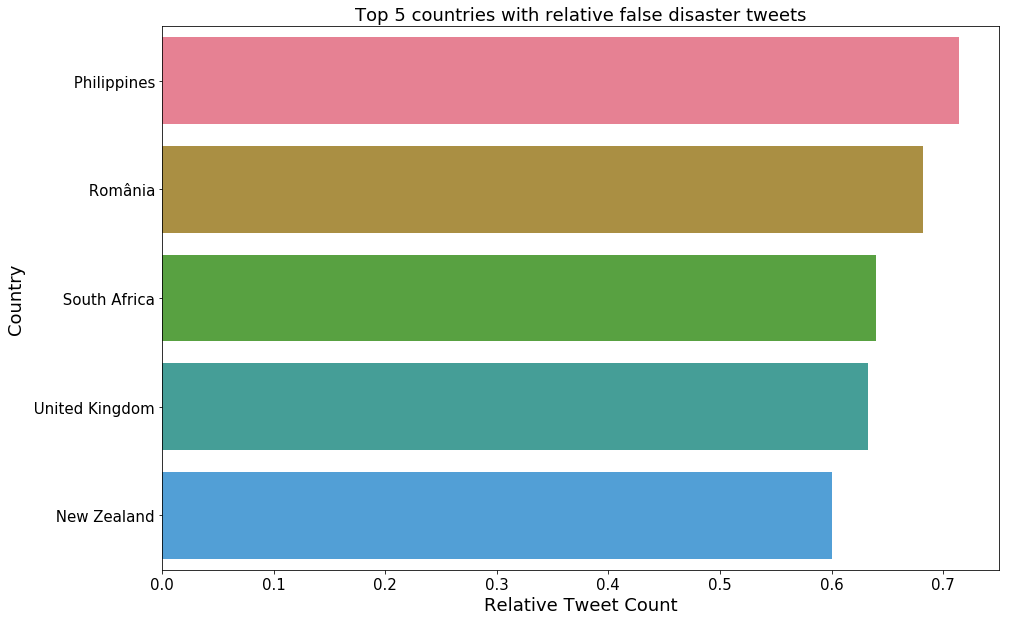

In [140]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_5_ctry_not_targeted['relative_not_targeted_ctry_count'], y=top_5_ctry_not_targeted['country'],
               orient='h')

g.set_title('Top 5 countries with relative false disaster tweets', fontsize=18)
g.set_xlabel('Relative Tweet Count', fontsize=18)
g.set_ylabel('Country', fontsize=18)

## Top 10 keywords más usadas por país

In [157]:
keyword_by_country = tweets_location.groupby(['country','keyword']).size().to_frame()
keyword_by_country.reset_index(inplace=True)
keyword_by_country.columns = ['country', 'keyword', 'count']
top_10_keyword_by_country = keyword_by_country.nlargest(10, ['count'])

Text(0,0.5,'Keyword, Country')

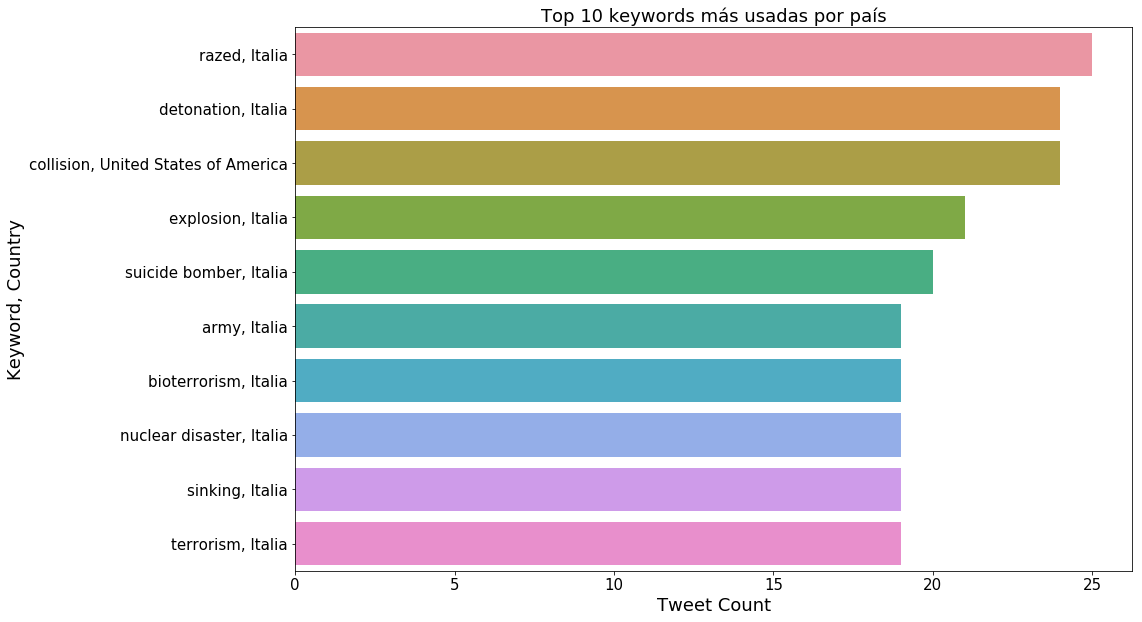

In [158]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_10_keyword_by_country['count'], 
                y=top_10_keyword_by_country['keyword'] + ',' + top_10_keyword_by_country['country'],
               orient='h')

g.set_title('Top 10 keywords más usadas por país', fontsize=18)
g.set_xlabel('Tweet Count', fontsize=18)
g.set_ylabel('Keyword, Country', fontsize=18)

## Top 10 keywords más usadas por país y que se trate de tweets reales

In [159]:
keyword_by_country = tweets_location.groupby(['country','keyword','target']).size().to_frame()
keyword_by_country.reset_index(inplace=True)
keyword_by_country.columns = ['country', 'keyword','target', 'count']
top_10_targeted_keyword_by_country = keyword_by_country.loc[keyword_by_country['target'] == 1].nlargest(10, ['count'])

Text(0,0.5,'Keyword, Country')

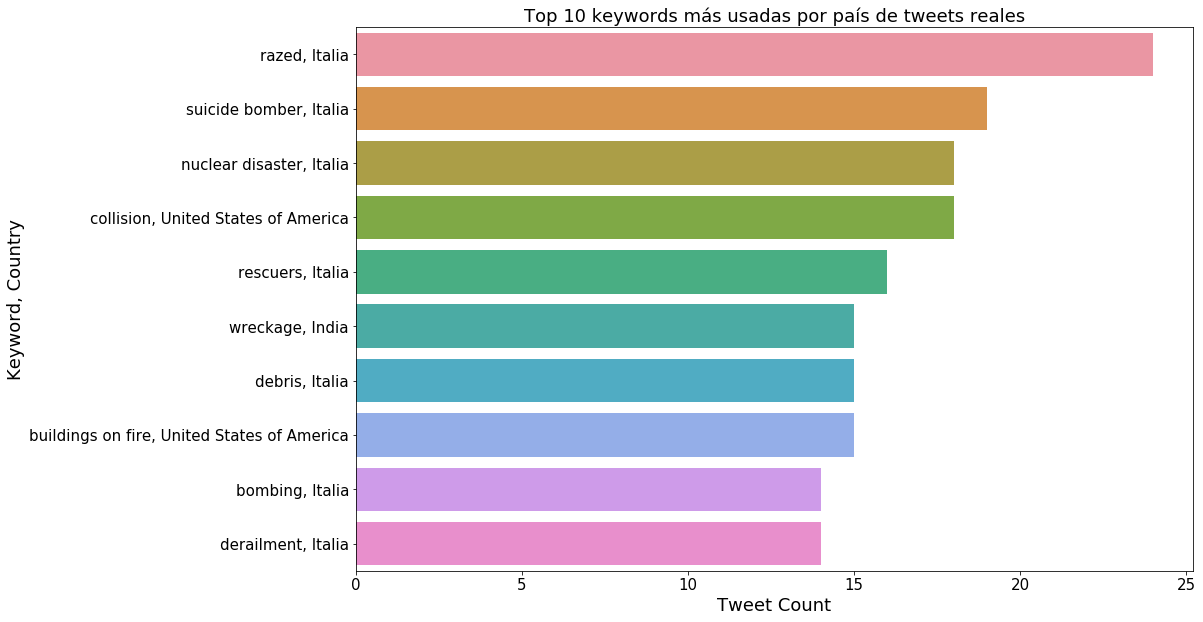

In [161]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_10_targeted_keyword_by_country['count'], 
                y=top_10_targeted_keyword_by_country['keyword'] + ',' + top_10_targeted_keyword_by_country['country'],
               orient='h')

g.set_title('Top 10 keywords más usadas por país de tweets reales', fontsize=18)
g.set_xlabel('Tweet Count', fontsize=18)
g.set_ylabel('Keyword, Country', fontsize=18)